You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: xlabel='Age', ylabel='Count'>

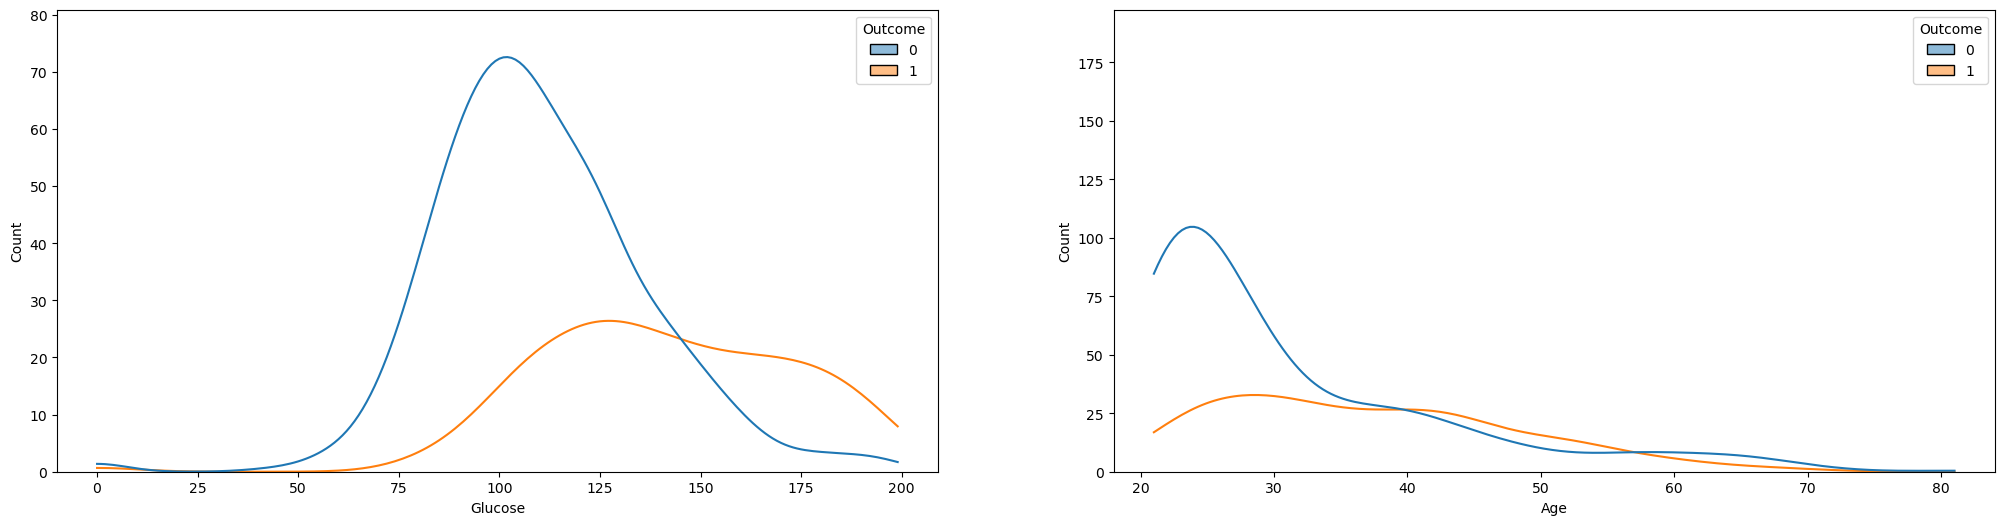

In [6]:
plt.subplots(1,2,figsize=(25,6))

plt.subplot(1,2,1)
sns.histplot(x=df['Glucose'],kde=True,shrink=0,hue=df['Outcome'])

plt.subplot(1,2,2)
sns.histplot(x=df['Age'],kde=True,shrink=0,hue=df['Outcome'])


## Observation
- Person whose having diabetes thier glucose level also high
- Chances of person whose age between 20-45 are more daibetes than other age   

<AxesSubplot: >

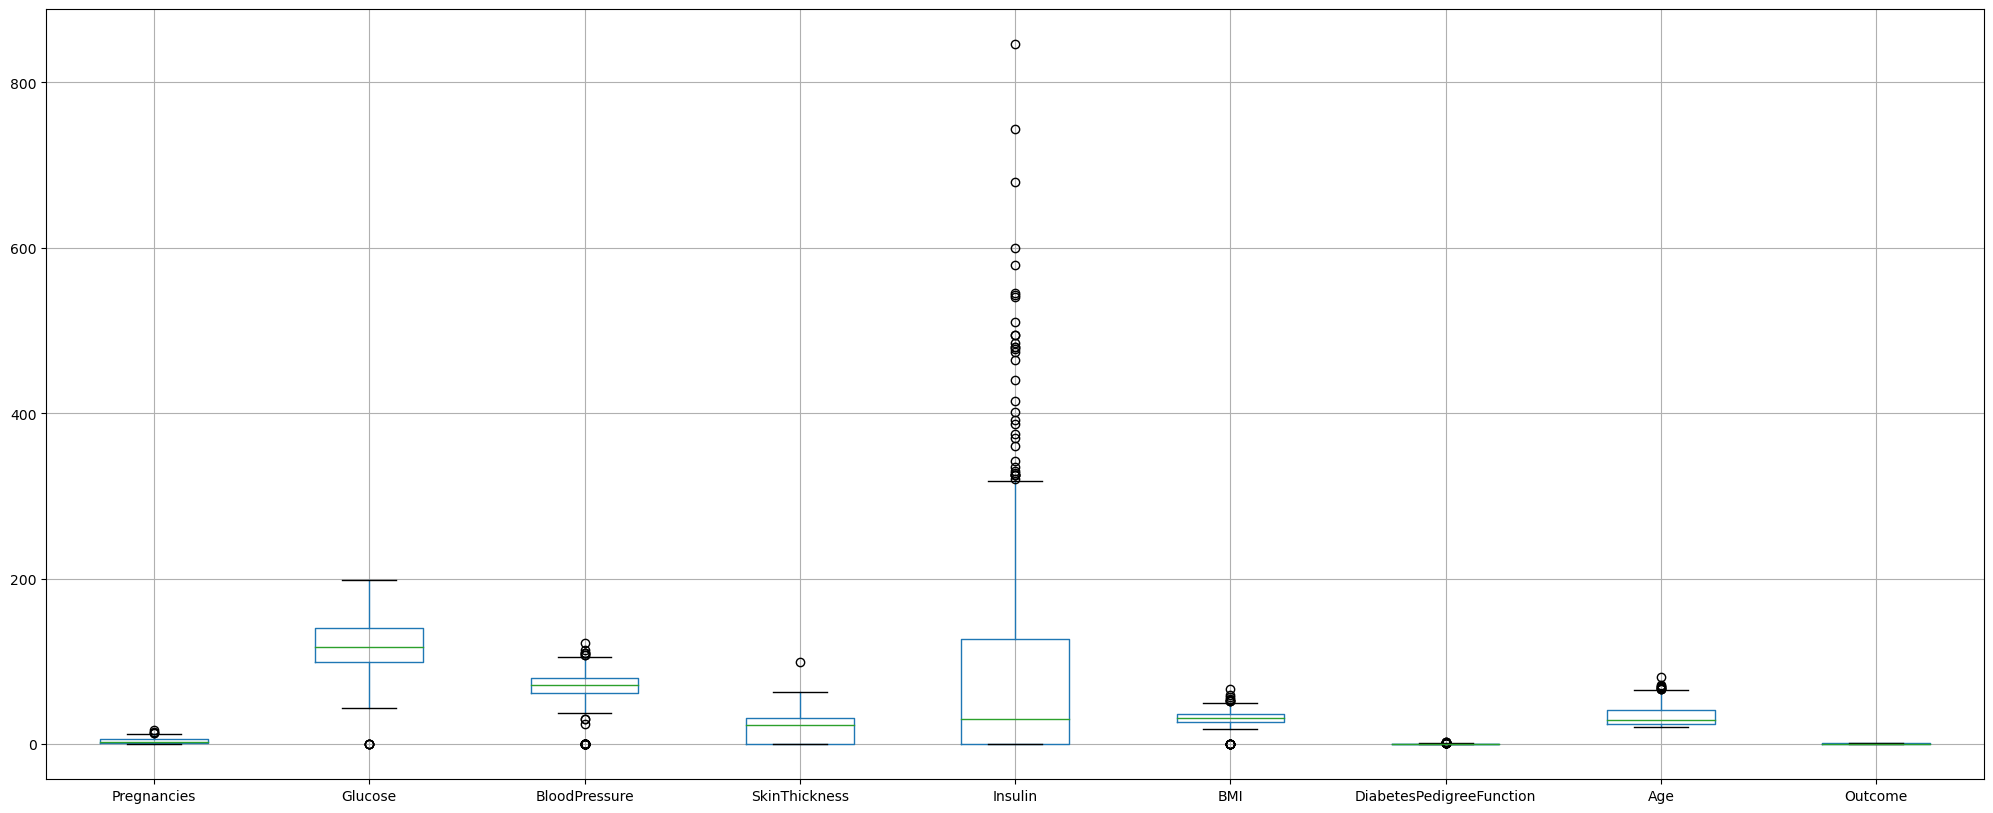

In [7]:
plt.figure(figsize=(25,10))
df.boxplot()

## Observation

- There are many outliers in a Dataset ,Insulin features has more number of outliers

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observation
- There is no missing values in dataset

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.


In [9]:
# Removing Oultiers by IQR
def remove_outliers_iqr(data, threshold=1.5):

    if isinstance(data, np.ndarray):
        q1 = np.percentile(data, 25, axis=0)
        q3 = np.percentile(data, 75, axis=0)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        mask = (data >= lower_bound) & (data <= upper_bound)
        return data[mask.all(axis=1)]

    elif isinstance(data, pd.DataFrame):
        # Apply the function recursively to each column
        cleaned_data = data.copy()
        for column in data.columns:
            column_data = data[column]
            q1 = column_data.quantile(0.25)
            q3 = column_data.quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            cleaned_data = cleaned_data[
                (cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)
            ]

        return cleaned_data

    else:
        raise ValueError("Input data must be a NumPy array or a Pandas DataFrame")

cleaned_df = remove_outliers_iqr(df)

cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


In [10]:
# Spliting train test
from sklearn.model_selection import train_test_split

X=cleaned_df.drop('Outcome',axis=1)
y=cleaned_df['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Sclaing 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Pre Pruning
parameter={'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':[1,2,3,4,5],
          'max_features':['auto','sqrt','log2']
          }

clf=GridSearchCV(DecisionTreeClassifier(max_depth=2),param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(X_train_scaled,y_train)
y_pred=clf.predict(X_test_scaled)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.ch


Model Accuracy in %: 78.125
Model Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       108
           1       0.39      0.70      0.50        20

    accuracy                           0.78       128
   macro avg       0.66      0.75      0.68       128
weighted avg       0.85      0.78      0.80       128

AUC: 0.6618357487922705


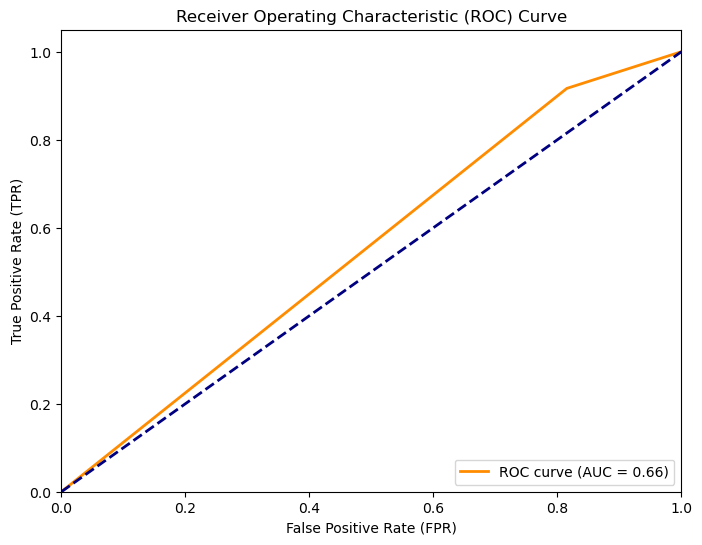

In [31]:
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,classification_report

y_pred4= clf.predict_proba(X_test)[:, 1]  # Predict class probabilities for class 1

# Accuracy
print("Model Accuracy in %:",accuracy_score(y_pred,y_test)*100)

# Classification report
print("Model Classification report: ")
print(classification_report(y_pred,y_test))

#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.


In [ ]:
"""
Interpreting a decision tree model for a diabetes dataset is essential for understanding how the model predicts diabetes
risk and identifying the key features influencing those predictions. The process involves analyzing the tree's structure, 
examining splits, and extracting meaningful insights:



Root Node:
Begin by inspecting the root node, which represents the most critical feature and its threshold for the initial data split.
This primary feature typically plays a crucial role in diabetes prediction. For instance, a split on "Glucose Level" <= 125
mg/dL signifies that glucose level is pivotal in assessing diabetes risk.

Child Nodes:
Progress down the tree's branches, observing each split that denotes decisions based on specific features and thresholds.
Analyze these splits to comprehend how the model segments the data. A split on "BMI" <= 30, for example, indicates the
significance of body mass index in predicting diabetes.

Leaves: 
Investigate the terminal nodes or leaves, each representing a distinct outcome prediction. The majority class in each leaf
determines whether an instance is predicted as diabetic or non-diabetic. Assess the class distribution in leaves to 
understand the decision criteria, identifying which conditions lead to high or low diabetes risk.

Variable Importance:
The model quantifies variable importance, highlighting features that most effectively reduce impurity (e.g., Gini impurity
or entropy). Variables near the top of the tree are generally more influential in predictions.

Threshold Values:
Pay attention to the specific thresholds used for splits, as these demarcate key points in diabetes risk assessment.
For instance, "Blood Pressure" <= 80 mm Hg implies a significant threshold related to blood pressure.

Patterns and Trends:
Interpret the tree's decisions within the context of diabetes risk factors, leveraging domain knowledge. For example, 
if "BMI" emerges as a prominent feature, it aligns with the understanding that genetics contributes to diabetes 
susceptibility.

Pruning: 
In cases of deep trees, you may encounter pruned subtrees, where branches are trimmed. Pruning is applied to combat
overfitting while maintaining interpretability.

Visualization:
Utilize tree visualization tools to depict the tree's structure graphically, aiding in the interpretation process.
"""

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.


In [ ]:
"""
Validating a decision tree model for a diabetes dataset is a critical step in ensuring its reliability and usefulness
in real-world healthcare applications. The validation process involves assessing the model's performance, stability, 
and ability to make accurate predictions under various conditions. Here's a detailed approach:

Begin by splitting the dataset into training and testing sets, reserving a portion of the data for validation. Calculate
essential performance metrics, such as accuracy, precision, recall, F1-score, and AUC-ROC, using the testing set. These
metrics provide quantitative measures of the model's predictive power.

Perform sensitivity analysis to identify the most influential features in diabetes prediction. Explore how changes in 
hyperparameters, like tree depth and node splitting criteria, affect model performance. Sensitivity analysis helps 
pinpoint critical factors for accurate predictions.

Scenario testing is vital for assessing the model's robustness. Simulate concept drift by testing the model on data
from different time periods to evaluate its adaptability. Assess its performance in extreme cases with unusual feature
values and missing data, mirroring real-world healthcare scenarios.

Cross-validation ensures the model's consistency across different data subsets, enhancing its generalization capabilities.
In dynamic healthcare environments, continuously monitor the model's performance and adaptability to evolving patient
demographics or healthcare practices.

Document the validation process comprehensively and communicate findings to healthcare practitioners and stakeholders. 
This documentation facilitates trust and informed decision-making regarding the model's deployment and use in clinical
settings.

Continuous improvement based on validation results enhances the model's reliability and efficacy over time.

Validating a decision tree model for a diabetes dataset empowers healthcare professionals with a trustworthy tool for
diabetes risk assessment and management, ultimately improving patient outcomes and healthcare decision-making.
"""